<a href="https://colab.research.google.com/github/klzlykos9/sample-project/blob/main/C_Vs__D_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:05<00:00, 232MB/s]
100% 1.06G/1.06G [00:05<00:00, 212MB/s]


In [6]:
# to unzip
!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [8]:
# generators ram efficiency
# this creates a tensorflow/keras dataset from a directory of images
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',  # train path
    labels = 'inferred', # it tells keras to automaticaly assign labels so cat 0 and dog 1
    label_mode = 'int', # specifies how labels are returned as integer class indices(e.g. 0,1,2)
    batch_size = 32,
    image_size = (256, 256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# now it all stored in numpy array
# and every numpy values is from 0 to 255 but we hv to normalize to 0 to 1

# Normalize

def process(image, label):   # it takes 2 inputs image and the class label
  image = tf.cast(image/255. , tf.float32)  # /255 will range to 0-1, flot32 standard format for Tensoflowmodels
  return image, label   # returned image and its label as a tuple

  train_ds = train_ds.map(process) # applies the process function to every image-label pair
  validation_ds = validation_ds.map(process)

In [17]:
# Create CNN model
model = Sequential([
    Input(shape = (256,256,3)), # 256 x 256 pixels, 3 channels (RGB) First layer must define input shape in Sequential model
    BatchNormalization(),
    Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu'), # first layer 32 features each filter is 3 x 3, np padding output gets smaller
    MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),

    Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),

    Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'),

    Flatten(),

    Dense(128, activation = 'relu'),
    Dropout(0.1),
    Dense(64, activation = 'relu'),
    Dropout(0.1),
    Dense(1, activation = 'sigmoid')
])

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 256, 256, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,077 (56.64 MB)

 Trainable params: 14,847,687 (56.64 MB)

 Non-trainable params: 390 (1.52 KB)

In [19]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 77ms/step - accuracy: 0.5644 - loss: 1.7247 - val_accuracy: 0.6958 - val_loss: 0.5856
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.6924 - loss: 0.5780 - val_accuracy: 0.7392 - val_loss: 0.5269
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.7526 - loss: 0.5206 - val_accuracy: 0.7784 - val_loss: 0.4729
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.8061 - loss: 0.4213 - val_accuracy: 0.8020 - val_loss: 0.4354
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.8501 - loss: 0.3439 - val_accuracy: 0.7598 - val_loss: 0.4882
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.8874 - loss: 0.2708 - val_accuracy: 0.7868 - val_loss: 0.5983
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 75ms/step - accuracy: 0.9317 - loss: 0.1777 - val_accuracy: 0.7674 - val_loss: 0.7021
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.9535 - loss: 0.1249 - 

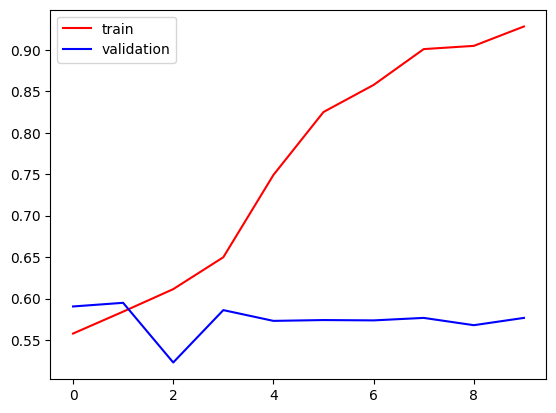

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

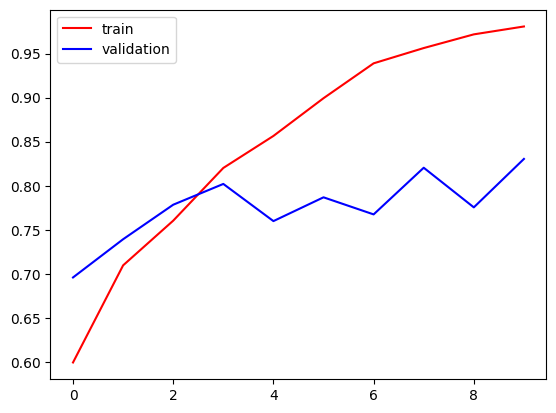

In [21]:
# After plot
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

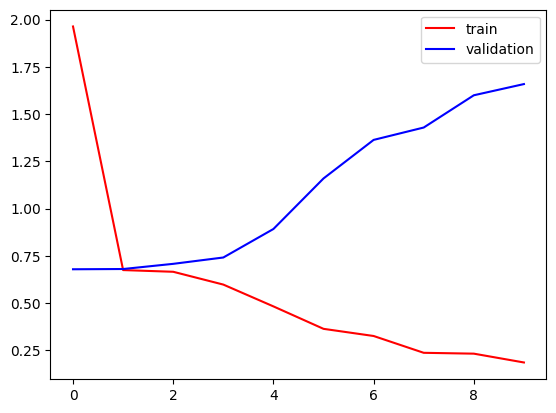

In [15]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [ ]:
# ways to overfitting

# Add more data
# Data Augmentation (create more data using augmentation)
# L1/L2 regularizer
# Dropout     -
# Batch Norm    -
# Reduce Complexity

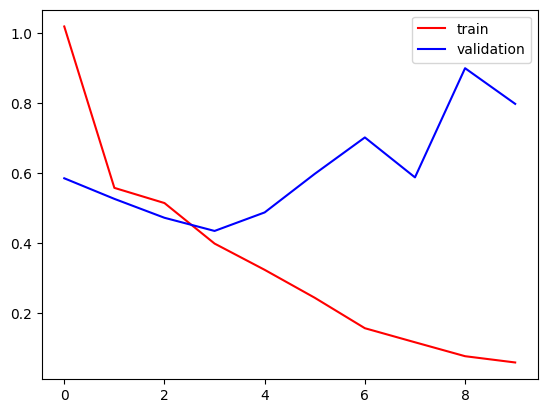

In [25]:
# After plot

plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [23]:
import cv2

In [26]:
test_img = cv2.imread('/content/Dog_Breeds.jpg')

In [29]:
# plt.imshow(test_img)

In [28]:
test_img.shape

(720, 960, 3)

In [35]:
import numpy as np

test_img = cv2.resize(test_img, (256, 256))


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/resize.cpp:3845: error: (-215:Assertion failed) !dsize.empty() in function 'resize'


In [36]:
test_input = test_img.reshape((1,256,256,3))

In [37]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.9985875]], dtype=float32)